<a href="https://colab.research.google.com/github/theshadow1604/IRIS/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files #choose file
uploaded=files.upload()

Saving Iris.csv to Iris.csv


In [4]:
Irisdata = pd.read_csv('Iris.csv')
Irisdata = Irisdata.drop(columns=['Id'])
Irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
Irisdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
Irisdata['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [8]:
Irisdata.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Figure size 1000x700 with 0 Axes>

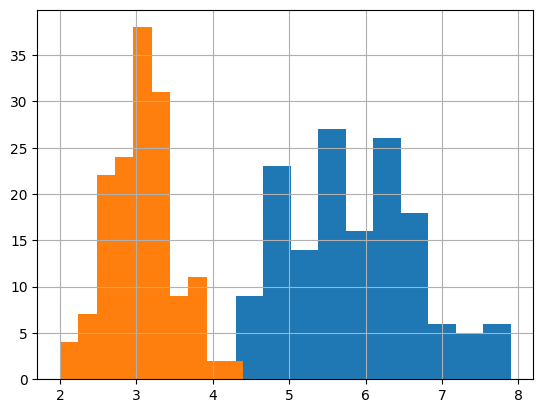

<Figure size 1000x700 with 0 Axes>

In [11]:
Irisdata['SepalLengthCm'].hist()
Irisdata['SepalWidthCm'].hist()
plt.figure(figsize=(10,7))

<Axes: >

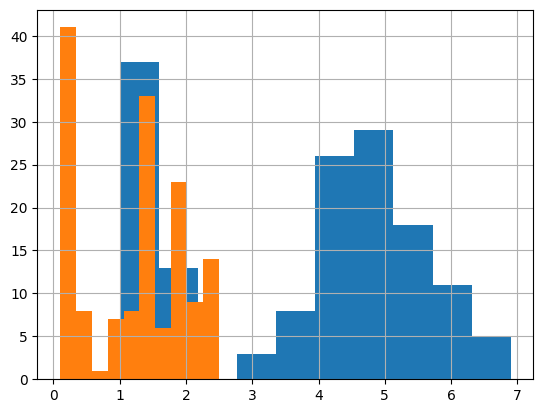

In [12]:
Irisdata['PetalLengthCm'].hist()
Irisdata['PetalWidthCm'].hist()

In [15]:
colors = ['yellow','Purple','red']
species =['Iris-setosa',
'Iris-versicolor',
'Iris-virginica']

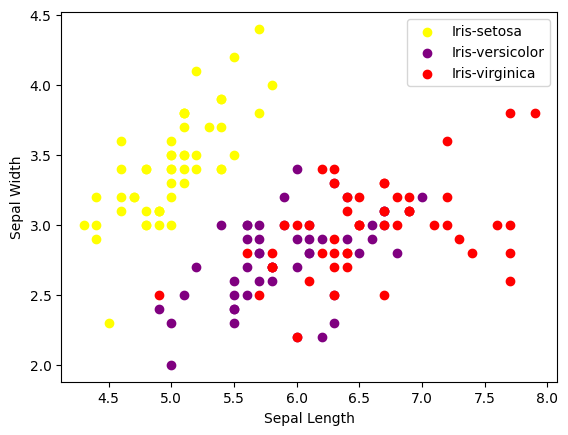

In [16]:
for i in range(3):
  x = Irisdata[Irisdata['Species']== species[i]]
  plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()

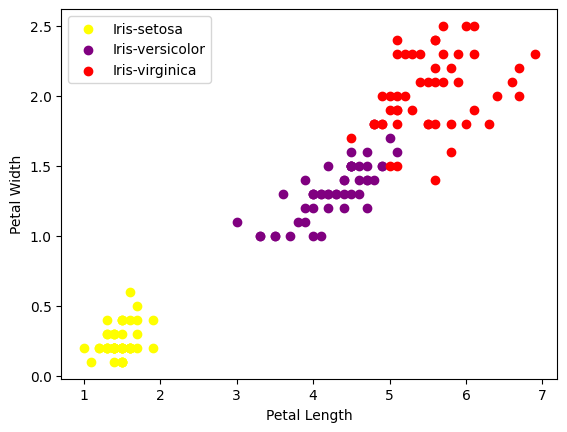

In [17]:
for i in range(3):
  x = Irisdata[Irisdata['Species']== species[i]]
  plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()

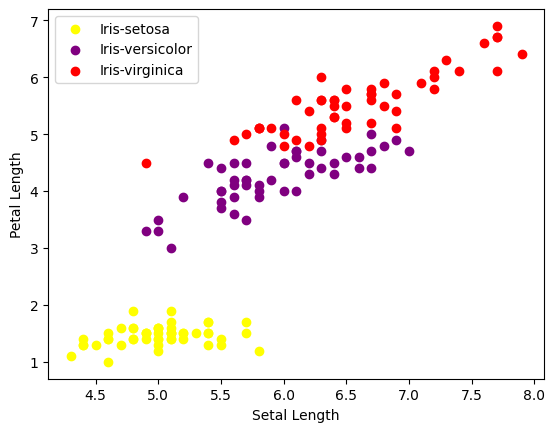

In [18]:
for i in range(3):
  x = Irisdata[Irisdata['Species']== species[i]]
  plt.scatter(x['SepalLengthCm'],x['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel('Setal Length')
plt.ylabel('Petal Length')
plt.legend()

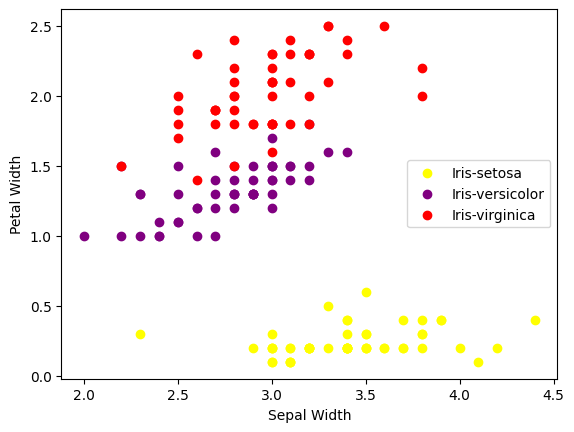

In [19]:
for i in range(3):
  x = Irisdata[Irisdata['Species']== species[i]]
  plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c = colors[i], label=species[i],marker='o')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.legend()

In [20]:
Irisdata.corr()

<ipython-input-20-1184cfad67c7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Irisdata.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-21-4583b735cbdd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = Irisdata.corr()


<Axes: >

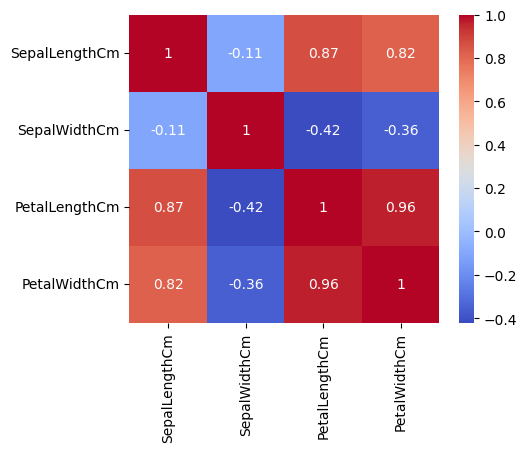

In [21]:
corr = Irisdata.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Irisdata['Species'] = le.fit_transform(Irisdata['Species'])
Irisdata.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = Irisdata.drop(columns=['Species'])
Y = Irisdata['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [25]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [27]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)

KNeighborsClassifier()

In [28]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  95.55555555555556


In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [30]:
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333
